<a href="https://colab.research.google.com/github/spandan-25/PROJECTS/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FASHION MNIST DATA CLASSIFICATION


#Step 1) Import Library


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

#Step 2) Load data

In [ ]:
(X_train, y_train),(X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()


In [ ]:
#Print the shape of data


In [ ]:
X_train.shape, y_train.shape, "***********", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '***********', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels =["T-shirt/top",	"Trouser",	"Pullover",	"Dress",	"Coat",	"Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#show image

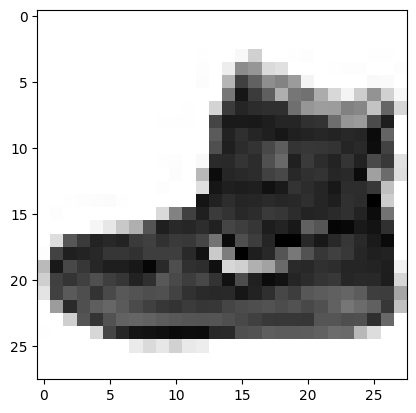

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

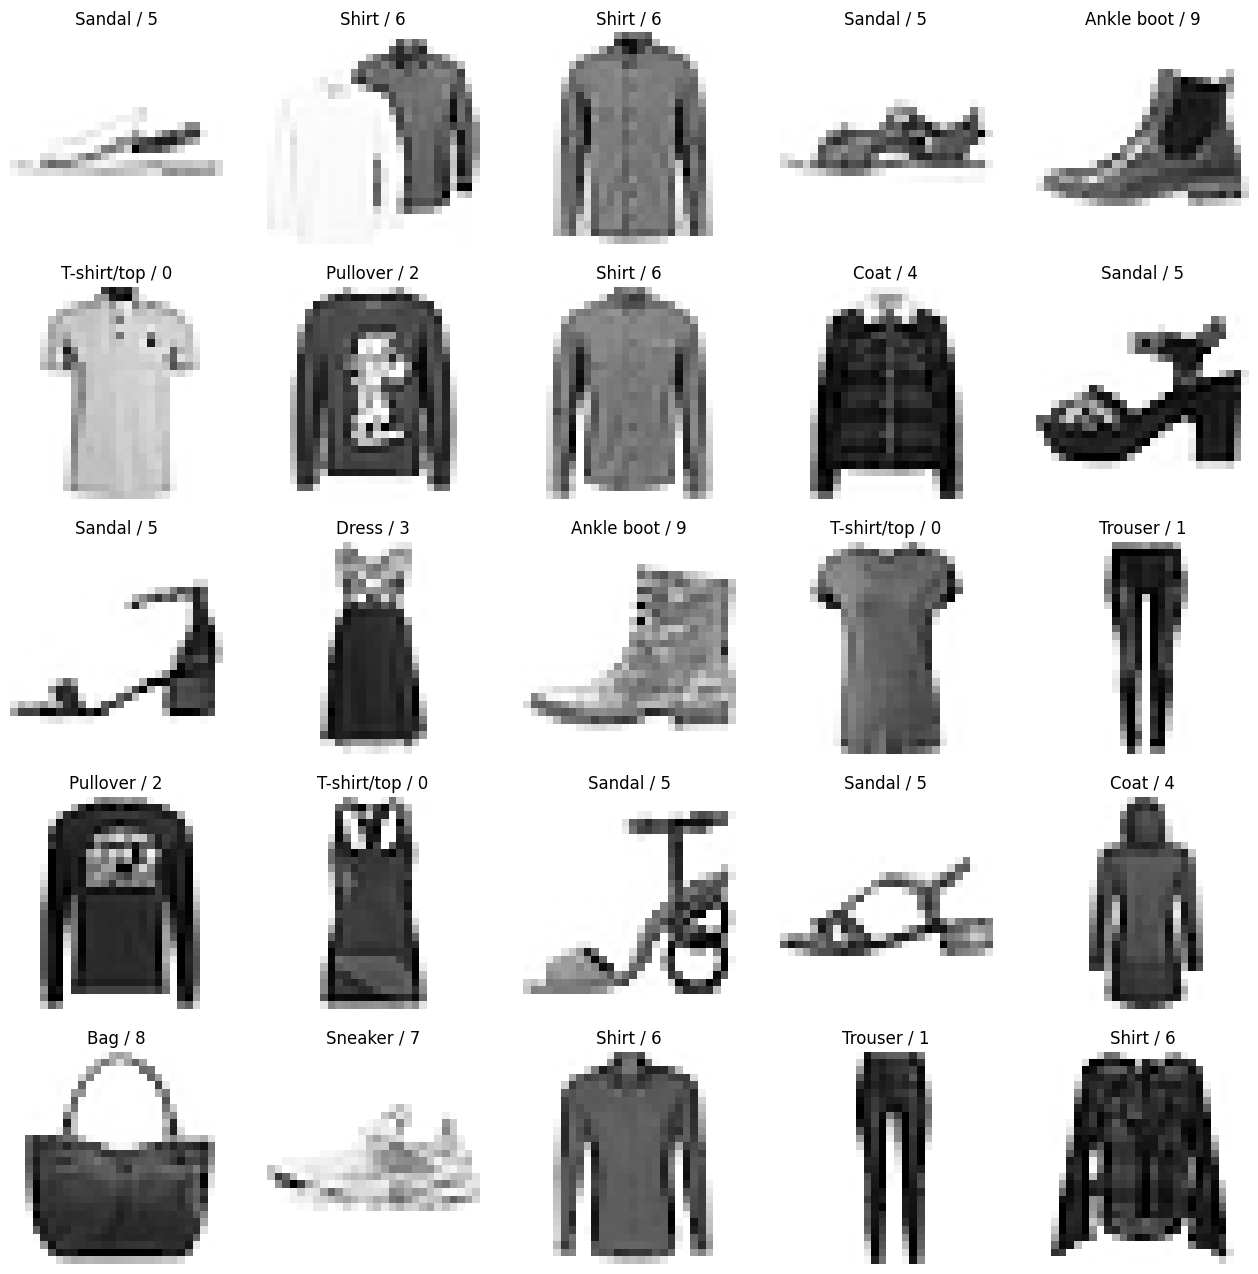

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train =np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test =np.expand_dims(X_test,-1)

In [ ]:
#feature scaling

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
#Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)


In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

#Step 3) Building the CNN Model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units =128,activation='relu'),
    keras.layers.Dense(units =10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 30s 316ms/step - loss: 0.6285 - accuracy: 0.7892 - val_loss: 0.4289 - val_accuracy: 0.8496
Epoch 2/10
94/94 [==============================] - 27s 292ms/step - loss: 0.3818 - accuracy: 0.8669 - val_loss: 0.3636 - val_accuracy: 0.8756
Epoch 3/10
94/94 [==============================] - 27s 288ms/step - loss: 0.3312 - accuracy: 0.8865 - val_loss: 0.3335 - val_accuracy: 0.8827
Epoch 4/10
94/94 [==============================] - 26s 280ms/step - loss: 0.3025 - accuracy: 0.8924 - val_loss: 0.3202 - val_accuracy: 0.8883
Epoch 5/10
94/94 [==============================] - 27s 285ms/step - loss: 0.2858 - accuracy: 0.8996 - val_loss: 0.3017 - val_accuracy: 0.8958
Epoch 6/10
94/94 [==============================] - 27s 283ms/step - loss: 0.2626 - accuracy: 0.9073 - val_loss: 0.2899 - val_accuracy: 0.8980
Epoch 7/10
94/94 [==============================] - 27s 290ms/step - loss: 0.2473 - accuracy: 0.9122 - val_loss: 0.2857 - val_accuracy: 0.8994

In [ ]:
y_pred=model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 5s 15ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.08, 0.02, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2770 - accuracy: 0.8995


[0.27699005603790283, 0.8995000123977661]

Actual = Ankle boot / 9 
Predicted = Ankle boot / 9
Actual = Sandal / 5 
Predicted = Sandal / 5
Actual = Sneaker / 7 
Predicted = Sneaker / 7
Actual = T-shirt/top / 0 
Predicted = T-shirt/top / 0
Actual = Sandal / 5 
Predicted = Sandal / 5
Actual = Shirt / 6 
Predicted = T-shirt/top / 0
Actual = Sneaker / 7 
Predicted = Sneaker / 7
Actual = Trouser / 1 
Predicted = Trouser / 1
Actual = Trouser / 1 
Predicted = Trouser / 1
Actual = Coat / 4 
Predicted = Coat / 4
Actual = Shirt / 6 
Predicted = Shirt / 6
Actual = Sneaker / 7 
Predicted = Sneaker / 7
Actual = Sandal / 5 
Predicted = Sandal / 5
Actual = Trouser / 1 
Predicted = Trouser / 1
Actual = Trouser / 1 
Predicted = Trouser / 1
Actual = Ankle boot / 9 
Predicted = Ankle boot / 9
Actual = Coat / 4 
Predicted = Coat / 4
Actual = T-shirt/top / 0 
Predicted = T-shirt/top / 0
Actual = Sandal / 5 
Predicted = Sandal / 5
Actual = T-shirt/top / 0 
Predicted = T-shirt/top / 0
Actual = T-shirt/top / 0 
Predicted = Shirt / 6
Actual = Ankle boo

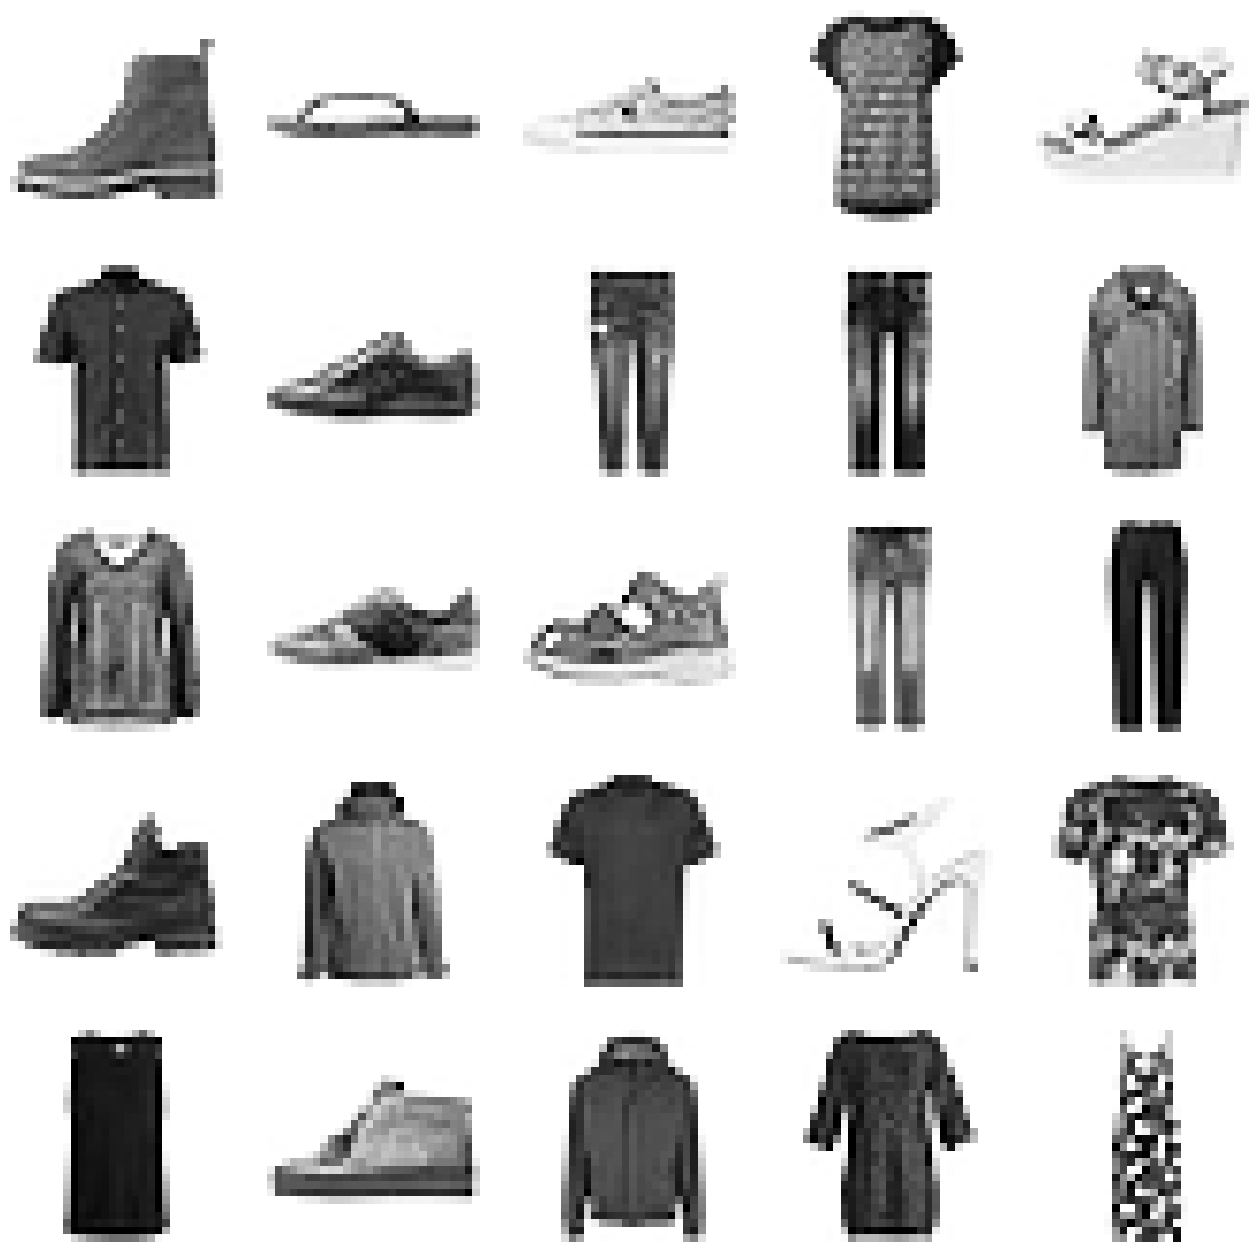

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5, 5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
  print('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

  plt.axis('off')

In [ ]:
#Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)


<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.80      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.87      0.84      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.84      0.85      0.85      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.72      0.72      0.72      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



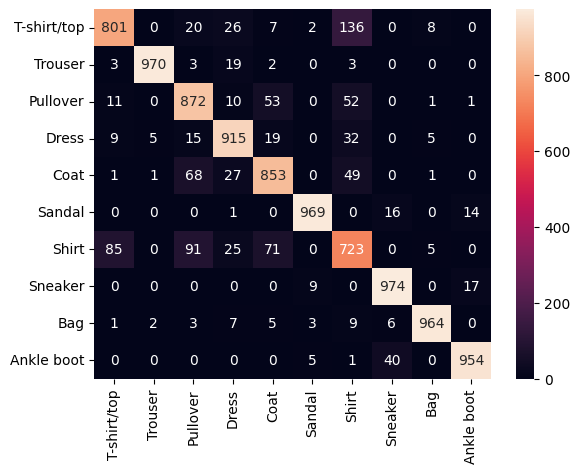

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
#Save Model

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D (filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers. Flatten(),
    keras.layers.Dense (units=128, activation ='relu'),
    keras.layers.Dropout (0.25), keras.layers.Dense (units=256, activation='relu'), keras.layers.Dropout (0.25),
    keras.layers.Dense (units=128, activation='relu'), keras.layers.Dense (units=10, activation='softmax')
    ])

In [ ]:
#Compile the model

cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model

cnn_model2.fit(X_train, y_train, epochs=5, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model2.save('fashion_mnist_cnn_mode12.h5')

cnn_model2.evaluate(X_test,y_test)

Epoch 1/5
94/94 [==============================] - 34s 351ms/step - loss: 0.1167 - accuracy: 0.9556 - val_loss: 0.3109 - val_accuracy: 0.9058
Epoch 2/5
94/94 [==============================] - 32s 338ms/step - loss: 0.1115 - accuracy: 0.9574 - val_loss: 0.3136 - val_accuracy: 0.9096
Epoch 3/5
94/94 [==============================] - 33s 348ms/step - loss: 0.1081 - accuracy: 0.9590 - val_loss: 0.3476 - val_accuracy: 0.9082
Epoch 4/5
94/94 [==============================] - 31s 331ms/step - loss: 0.1076 - accuracy: 0.9595 - val_loss: 0.3345 - val_accuracy: 0.9070
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.3097 - accuracy: 0.9072


[0.30972304940223694, 0.9071999788284302]

In [ ]:
#Building CNN model

cnn_model3=keras.models.Sequential([
      keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
      keras.layers.MaxPooling2D(pool_size=(2,2)),
      keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
      keras.layers.MaxPooling2D(pool_size=(2,2)),
      keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding= 'same', activation="relu"),
      keras.layers.MaxPooling2D(pool_size=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense (units=128, activation='relu'),
      keras.layers.Dropout(0.25),
      keras.layers.Dense (units=255, activation='relu'),
      keras.layers.Dropout (0.5),
      keras.layers.Dense (units=256, activation='relu'),
      keras.layers.Dropout (0.25),
      keras.layers.Dense (units=128, activation='relu'),
      keras.layers.Dropout (0.10),
      keras.layers.Dense (units=10, activation='softmax') ])

#Compile the model

cnn_model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model

cnn_model3.fit(X_train, y_train, epochs=5, batch_size=512, verbose=1, validation_data= (X_Validation, y_Validation))

cnn_model3.save('fashion_mnist_cnn_mode13.h5')

cnn_model3.evaluate(X_test,y_test)

Epoch 1/5
94/94 [==============================] - 72s 748ms/step - loss: 1.1926 - accuracy: 0.5440 - val_loss: 0.6211 - val_accuracy: 0.7542
Epoch 2/5
94/94 [==============================] - 76s 812ms/step - loss: 0.6075 - accuracy: 0.7721 - val_loss: 0.4906 - val_accuracy: 0.8129
Epoch 3/5
94/94 [==============================] - 72s 767ms/step - loss: 0.4994 - accuracy: 0.8128 - val_loss: 0.4257 - val_accuracy: 0.8428
Epoch 4/5
94/94 [==============================] - 69s 736ms/step - loss: 0.4241 - accuracy: 0.8465 - val_loss: 0.3817 - val_accuracy: 0.8624
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.3626 - accuracy: 0.8668


[0.3626219630241394, 0.8668000102043152]